# Distribucion de los Datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from IPython.display import Markdown
import warnings
warnings.filterwarnings("ignore")

sns.set_theme('paper')

Matplotlib is building the font cache; this may take a moment.


### Utiles

In [2]:
state_abreviations = [
    "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", "HI", "ID", 
    "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", 
    "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", 
    "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", 
    "WI", "WY"
]

state_dictionary = {
    "AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas", 
    "CA": "California", "CO": "Colorado", "CT": "Connecticut", "DC":"District of Columbia","DE": "Delaware", 
    "FL": "Florida", "GA": "Georgia", "HI": "Hawaii", "ID": "Idaho", "IL": "Illinois", 
    "IN": "Indiana", "IA": "Iowa", "KS": "Kansas", "KY": "Kentucky", "LA": "Louisiana", 
    "ME": "Maine", "MD": "Maryland", "MA": "Massachusetts", "MI": "Michigan", 
    "MN": "Minnesota", "MS": "Mississippi", "MO": "Missouri", "MT": "Montana", 
    "NE": "Nebraska", "NV": "Nevada", "NH": "New Hampshire", "NJ": "New Jersey", 
    "NM": "New Mexico", "NY": "New York", "NC": "North Carolina", "ND": "North Dakota", 
    "OH": "Ohio", "OK": "Oklahoma", "OR": "Oregon", "PA": "Pennsylvania", 
    "RI": "Rhode Island", "SC": "South Carolina", "SD": "South Dakota", "TN": "Tennessee", 
    "TX": "Texas", "UT": "Utah", "VT": "Vermont", "VA": "Virginia", "WA": "Washington", 
    "WV": "West Virginia", "WI": "Wisconsin", "WY": "Wyoming"
}

state_dictionary_inv = dict(zip(state_dictionary.values(), state_dictionary.keys()))

In [3]:
def showPie(columna, max=15, titulo=None):
  count_values = pd.Series(columna).value_counts()
  count_2 = count_values.copy()
  
  if max > count_values.shape[0]:
    max = count_values.shape[0]
  
  if len(count_values) > max:
      count_values = count_2.iloc[:max]
      count_values['Otros'] = count_2.iloc[max:].sum()
       
  datos = pd.DataFrame({"valor":count_values.index, "ocurrencia": count_values.values})

  if titulo == 'None':
    plt.title(columna.name)
  else:
    plt.title(titulo)
  plt.pie(datos["ocurrencia"], labels=datos['valor'], autopct='%1.1f%%')
  plt.show()
 
def concatenar(data_1, data_2,  axis=1):
  return pd.concat([data_1, data_2], axis=axis)

def contar_nulos(data):
  return data.isna().sum()

def mapear(columna: pd.Series, mapa={'NO': 0, 'SI':1}):
  return columna.map(mapa)

def showPiePx(columna, max=15, pref="", title=""):
  count_values = pd.Series(columna).value_counts()
  count_2 = count_values.copy()
  
  if max > count_values.shape[0]:
    max = count_values.shape[0]
  
  if len(count_values) > max:
      count_values = count_2.iloc[:max]
      count_values['Otros'] = count_2.iloc[max:].sum()
      
  if 'Otros' not in count_values.index:
    count_values['Otros'] = 0
  
  datos = pd.DataFrame({"valor":count_values.index, "ocurrencia": count_values.values})

     
  # Plot pie chart using Plotly Express
  fig = px.pie(datos, values='ocurrencia', names='valor', title=title)
  fig.update_traces(textposition='outside', textinfo='percent+label')
  fig.show()

def nulos_filas(data):
    return pd.DataFrame(data.isna().sum(axis=1).value_counts().reset_index().values, columns=['cant_col_nulas', 'cantidad'])

def resumen(data, nombre_tabla="Resumen Tabla"):
    filas, columnas = data.shape
    valores = filas * columnas
    nulos, duplicados =  data.isna().values.sum(), data.duplicated().sum()
    tasa_nulos, tasa_duplicados = nulos / valores, duplicados / valores

    salida = f'''<table>
    <thead>
    <tr><th colspan=3 style='text-align: center'>{nombre_tabla}</th></tr>
    </thead>
    <tbody>
    <tr><th> Detalle </th><th> Cantidad </th><th>Tasa</th></tr>
    <tr><td> Filas </td><td style='text-align: right'> {filas} </td><td style='text-align: center'>---</td><tr/>
    <tr><td> Columnas </td><td style='text-align: right'> {columnas} </td><td style='text-align: center'>---</td><tr/>
    <tr><td> Valores </td><td style='text-align: right'> {valores} </td><td style='text-align: center'>---</td<tr/>
    <tr><td> Nulos </td><td style='text-align: right'> {nulos} </td><td style='text-align: right'> {round(100*tasa_nulos, 2)} % </td><tr/>
    <tr><td> Duplicados </td><td style='text-align: right'> {duplicados} </td><td style='text-align: right'> {round(100*tasa_duplicados, 2)} %</td><tr/>
    </tbody>
    </table>'''

    display(Markdown(salida))

def ver_nulos_x_fila(data):
  ax = sns.barplot(x=nulos_filas(data).cant_col_nulas, y=nulos_filas(data).cantidad)
  for i in ax.containers:
      ax.bar_label(i,)
  plt.title("cantidad nulos x fila")
  plt.show()

def ver_nulos_x_columna(data):
  nulos_columnas = data.isna().sum()[data.isna().sum() > 0].sort_values(ascending=False)
  # ax = sns.barplot(x=nulos_columnas.index, y=nulos_columnas.values)
  if len(nulos_columnas) > 0:
    ax = sns.barplot(x=nulos_columnas.index, y=nulos_columnas.values)
    for i in ax.containers:
      ax.bar_label(i,)

def get_state_ab(st):
    try:
        state = st.split(', ')[-1].split(' ')[0]
        if state in state_abreviations:
            return state
        else:
            return np.nan
    except:
        return np.nan

# 1. Distribución de Datos

Preparamos las variables de los orígenes de datos

In [4]:
URL_MAPS_RESTAURANTES = r'Generated\Google\metada_sitios.parquet'
URL_MAPS_REVIEWS_ESTADOS = r'Generated\Google\reviews-estados.parquet'
URL_MAPS_REVIEWS_SITE_REVIEWS = r'Generated\Google\merge_site_reviews.parquet'

## 1.1 Dataset de Maps Restaurantes

Leemos el Dataset Contenido en un archivo formato <code>Parquet</code> que contiene la información obtenida de Google Maps sobre sitios, ya filtrada por la categoría 'restaurant'.

In [5]:
df_maps_restaurantes = pd.read_parquet(URL_MAPS_RESTAURANTES)

Vamos a trabajar sobre los sitios en 5 estados que tienen mayor presencia por cantidad de locales.

In [6]:
# Agregamos una columna que representa el estado de la locación obtenida en base a la columna 'address'   
df_maps_restaurantes['state_ab'] = df_maps_restaurantes['address'].apply(get_state_ab)



Distribución de Sitios por Estado

In [7]:
fig = px.bar(df_maps_restaurantes['state_ab'].value_counts().reset_index().sort_values(by='count'), x='count', y='state_ab', orientation='h')

fig.update_layout( width=800, title="Sitios por Estado", yaxis_title="Estado", xaxis_title="Cantidad Sitios")

fig.show()

Filtramos por estados

In [8]:
# Obtenemos los 5 estados con mayor presencia
top_5 = df_maps_restaurantes['state_ab'].value_counts().head(5).index.to_list()
df_maps_restaurantes = df_maps_restaurantes[df_maps_restaurantes['state_ab'].isin(top_5)]
df_maps_restaurantes.reset_index(drop=True, inplace=True)

In [9]:
fig = px.bar(df_maps_restaurantes['state_ab'].value_counts().reset_index().sort_values(by='count'), x='count', y='state_ab', orientation='h'
,color='count', color_continuous_scale=['blue', 'red'])

fig.update_layout( height=350, width=600,  yaxis_title="Estado", xaxis_title="Cantidad Sitios", title={
        'text': 'Sitios por Estado',
        'x': 0.5, # Center the title horizontally
        'y': 0.95, # Adjust the vertical position of the title
        'xanchor': 'center',
        'yanchor': 'top'
    })

fig.show()

Con información actualizada comenzamos el análisis de distribuciones de los datos.

In [10]:
df_maps_restaurantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81394 entries, 0 to 81393
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              81394 non-null  object 
 1   address           81394 non-null  object 
 2   gmap_id           81394 non-null  object 
 3   description       25569 non-null  object 
 4   latitude          81394 non-null  float64
 5   longitude         81394 non-null  float64
 6   category          81394 non-null  object 
 7   avg_rating        81394 non-null  float64
 8   num_of_reviews    81394 non-null  int64  
 9   price             36360 non-null  object 
 10  hours             72996 non-null  object 
 11  MISC              80921 non-null  object 
 12  state             73245 non-null  object 
 13  relative_results  64236 non-null  object 
 14  url               81394 non-null  object 
 15  state_ab          81394 non-null  object 
dtypes: float64(3), int64(1), object(12)
memo

In [11]:
# display(Markdown("<br> ".join([f"<td>{i}</td>" for i in df_maps_restaurantes])))

In [12]:
# display(Markdown("### 1.1.1 Columna name"))

### 1.1.1 Columna <code>Name</code>

Obtenemos el contedo de los nombres de los sitios

In [13]:
conteo_restaurantes = df_maps_restaurantes['name'].value_counts()

cantidad_nombres_distintos = len(df_maps_restaurantes['name'].apply(lambda s: s.lower()).unique())

cantidad_nombres_distintos

61911

Ya que la cantidad de sitios distintos es muy grande, tomamos sólo los 25 primeros

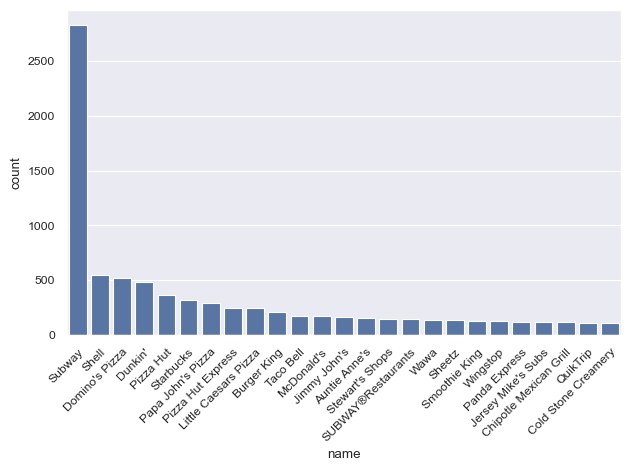

In [14]:
ax = sns.barplot(conteo_restaurantes.head(25))
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right",rotation_mode='anchor')
plt.tight_layout()
plt.show()

Vemos que <code>Subway</code> es por lejos el que mayor diferencia lleva.

### 1.1.2 Columna <code>address</code>

In [15]:
def split(s, n=None):
    try:
        return s.split(",")[n]
    except:
        return np.nan
    return np.nan

In [16]:
pd.set_option('display.max_colwidth', 0)

In [17]:
df_maps_restaurantes.address.sample(5)

21585    Checkers - Closed, 7890 NW 25th St, Doral, FL 33122                  
39836    Jack in the Box, 4626 Fredericksburg Rd, San Antonio, TX 78201       
14623    Ricos Tacos, 2631 E 130th St, Compton, CA 90222                      
40306    Miso Nara, 22 S Main St, New City, NY 10956                          
70875    El Deseo Restaurant & Lounge, 1551 NW 119th St, North Miami, FL 33167
Name: address, dtype: object

Vemos que las direcciones son compuestas, por eso, puedo proceder a dividirlas. A simple mista parece el formato de <code>nombre sitio</code>, <code>numero calle</code>, <code>ciudad</code>, <code>estado</code> y <code>código postal</code>, delimitados por <code>,</code> lo que nos servirá para estudiarlas.

In [18]:
cuenta_segmentos = df_maps_restaurantes.address.apply(lambda s: len(s.split(","))).value_counts().reset_index().rename({'address': 'segmentos', 'count':'cantidad'}, axis=1)

cuenta_segmentos['pct'] = round(((cuenta_segmentos['cantidad'] / len(df_maps_restaurantes)))*100, 2)

cuenta_segmentos

,segmentos,cantidad,pct
0,4,77703,95.47
1,5,2387,2.93
2,3,1031,1.27
3,6,235,0.29
4,7,31,0.04
5,8,6,0.01
6,9,1,0.00


Ya que más del 95% de los datos utilizan ese formato, podemos filtrarlas y estudiarlas.

In [19]:
direcciones = df_maps_restaurantes.query("address.str.split(',').str.len() == 4")['address']
direcciones

0        San Soo Dang, 761 S Vermont Ave, Los Angeles, CA 90005          
1        Vons Chicken, 12740 La Mirada Blvd, La Mirada, CA 90638         
2        Vivi Bubble Tea, 701 S 5th St, Philadelphia, PA 19147           
3        Cape Seafood Shack, 603 Del Prado Blvd S, Cape Coral, FL 33990  
4        Fresh Point Country Buffet, 10525 US-19, Pinellas Park, FL 33782
                                       ...                               
81389    Royal Bavarian Schnitzel Haus, 1085 NE 79th St, Miami, FL 33138 
81390    Panheads Pizzeria, 4085 S Ridgewood Ave, Port Orange, FL 32127  
81391    Subpreme Grill, 15260 SW 280th St UNIT 111, Homestead, FL 33032 
81392    Dunkin', 7000 Chester Ave, Philadelphia, PA 19142               
81393    Steak 48, 260 S Broad St, Philadelphia, PA 19102                
Name: address, Length: 77703, dtype: object

Según nombre de sitio

In [20]:
direcciones.apply(lambda s: split(s, 0)).value_counts().head(15)

address
Subway                  2653
Domino's Pizza          512 
Shell                   510 
Dunkin'                 425 
Pizza Hut               360 
Starbucks               310 
Papa John's Pizza       288 
Little Caesars Pizza    245 
Pizza Hut Express       217 
Burger King             189 
Taco Bell               165 
McDonald's              164 
Jimmy John's            160 
Auntie Anne's           147 
Stewart's Shops         138 
Name: count, dtype: int64

Según Numero y Calle

In [21]:
direcciones.apply(lambda s: split(s, 1)).value_counts().head(15)

address
Unnamed Road                26
630 Old Country Rd          12
6000 Universal Blvd         12
9500 Gilman Dr              12
7800 Windrose Ave.          12
10250 Santa Monica Blvd     11
75 9th Ave                  11
949 Ruff Dr                 11
160 N Gulph Rd              10
136-20 Roosevelt Ave        10
1842 W Washington Blvd      10
18 N Dollins Ave            10
2820 Historic Decatur Rd    10
14006 Riverside Dr          9 
100 Main St                 9 
Name: count, dtype: int64

Según Ciudad

In [22]:
direcciones.apply(lambda s: split(s,2)).value_counts().head(15)

address
New York         3126
Houston          2398
Brooklyn         2300
Los Angeles      2165
Philadelphia     1559
San Francisco    1167
Miami            1138
San Diego        1023
Austin           1010
Dallas           1005
San Antonio      974 
Bronx            864 
Queens           830 
Orlando          748 
Tampa            592 
Name: count, dtype: int64

Según Estado y Código Postal

In [23]:
direcciones.apply(lambda s: split(s,3)).value_counts().head(15)

address
NY 10003    240
NY 10002    211
FL 33139    194
NY 10013    155
NY 11211    153
NY 10019    152
CA 92101    149
NY 11354    149
NY 10014    144
NY 10036    138
NY 10022    134
NY 10016    128
NY 10011    127
NY 11220    126
CA 91748    125
Name: count, dtype: int64

### 1.1.3 Columna <code>gmap_id</code>

Identificador de sitio en el mapa

Vemos que hay sitios que aparecen 2 veces y otros sólo una.

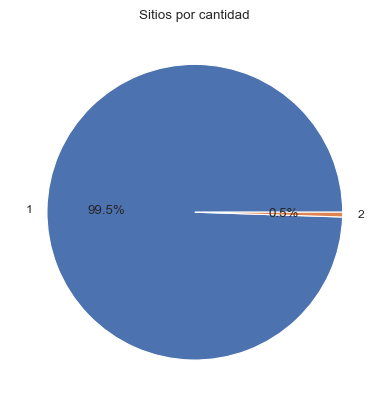

In [24]:
showPie(df_maps_restaurantes.gmap_id.value_counts(), titulo="Sitios por cantidad")

Vemos que sólo el 0.5 % de los valores se repiten, constituidos por 2 sitios comparten ubicación como máximo.

### 1.1.4 Columna <code>description</code>

In [25]:
descripciones = df_maps_restaurantes.description

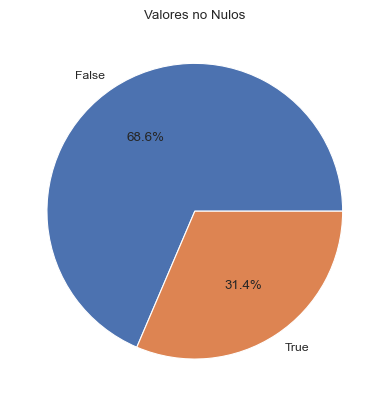

In [26]:
showPie(descripciones.notna(), titulo="Valores no Nulos")

Vamos a analizar el segmento de los valores no nulos

In [27]:
descripciones.dropna(inplace=True)

Preparamos los valores

In [28]:

descripciones.drop_duplicates(inplace=True)
descripciones_text = " ".join(descripciones.tolist()).lower()

Definimos el Word Cloud

In [29]:
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True, background_color='white').generate(descripciones_text)

cuenta_palabras = pd.DataFrame(data=[wordcloud.process_text(descripciones_text)]).T.rename({0:'count'}, axis=1).sort_values(by='count',ascending=False)                    

In [30]:
cuenta_palabras.head(15)

,count
counter serve,991
menu,862
casual,725
served,623
classic,573
plus,544
setting,520
spot,500
bar,492
space,491


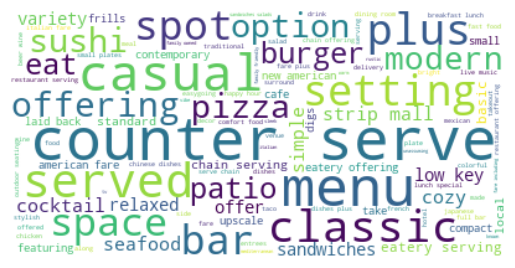

In [31]:
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

### 1.1.5 Análisis Distribución Geográfica

In [32]:
df_maps_restaurantes['state_name'] = df_maps_restaurantes['state_ab'].map(state_dictionary)

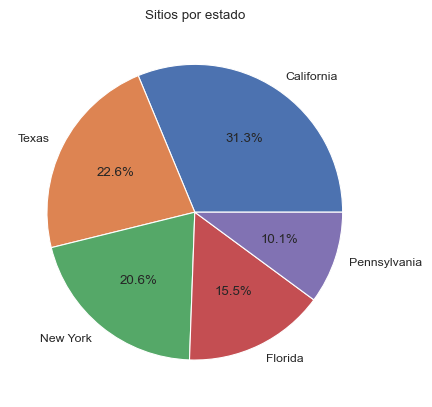

In [33]:
showPie(df_maps_restaurantes.state_name, titulo="Sitios por estado")

In [34]:
df_maps_restaurantes.query("latitude < 30 and state_ab == 'CA'")

df_maps_restaurantes.drop(65882, inplace=True, errors='ignore')

In [186]:
fig = px.box(df_maps_restaurantes, x='state_name', y='latitude', color='state_name')

# fig.show()

In [188]:
fig = px.box(df_maps_restaurantes, x='state_name', y='longitude', color='state_name')

# fig.show()

In [37]:
df_maps_restaurantes.drop(65882, inplace=True, errors="ignore")

In [38]:
def mapa_calor_estado(df, estado, radius=1, zoom=4):
    fig = px.density_mapbox(df, 
                        lat='latitude', 
                        lon='longitude',
                        radius=radius,
                        mapbox_style="open-street-map")

    fig.update_layout(title=f'Restaurantes {estado}',
                    mapbox=dict(center=dict(lat=df.latitude.mean(), lon=df.longitude.mean()), zoom=zoom),
                    margin=dict(l=0, r=0, t=30, b=0), width=600)

    return fig


In [189]:
california = df_maps_restaurantes.query("state_ab == 'CA'")

# mapa_calor_estado(california, 'California', radius=1.5)


In [190]:
pensilvania = df_maps_restaurantes.query("state_ab == 'PA'")

# mapa_calor_estado(pensilvania, "Pensilvania", zoom=5.5)

In [191]:
florida = df_maps_restaurantes.query("state_ab == 'FL'")

# mapa_calor_estado(florida, "Florida", zoom=4.5)

In [192]:
texas = df_maps_restaurantes.query("state_ab == 'TX'")

# mapa_calor_estado(texas, "Texas", zoom=4.5)

In [193]:
new_york = df_maps_restaurantes.query("state_ab == 'NY'")

# mapa_calor_estado(new_york, "New York", zoom=5)

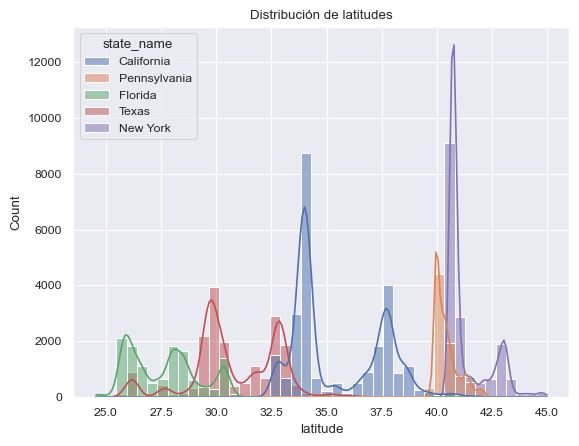

In [44]:

ax = sns.histplot(df_maps_restaurantes, x='latitude', hue='state_name', kde=True)


ax.set_title('Distribución de latitudes')

# Display the plot
plt.show()

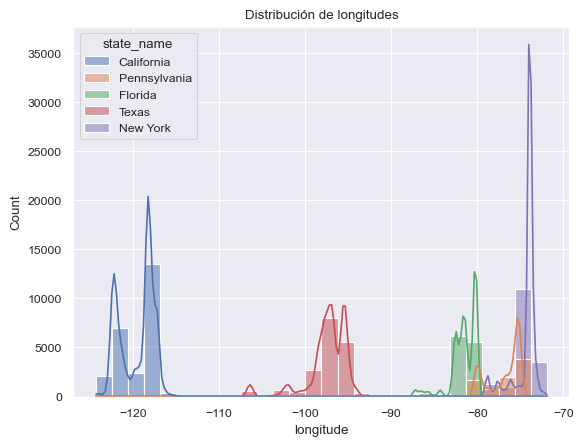

In [45]:
ax = sns.histplot(df_maps_restaurantes, x='longitude', hue='state_name', kde=True)


ax.set_title('Distribución de longitudes')

# Display the plot
plt.show()

### 1.1.6 Columna <code>category</code>

In [46]:
df_maps_restaurantes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81393 entries, 0 to 81393
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              81393 non-null  object 
 1   address           81393 non-null  object 
 2   gmap_id           81393 non-null  object 
 3   description       25569 non-null  object 
 4   latitude          81393 non-null  float64
 5   longitude         81393 non-null  float64
 6   category          81393 non-null  object 
 7   avg_rating        81393 non-null  float64
 8   num_of_reviews    81393 non-null  int64  
 9   price             36360 non-null  object 
 10  hours             72996 non-null  object 
 11  MISC              80920 non-null  object 
 12  state             73245 non-null  object 
 13  relative_results  64235 non-null  object 
 14  url               81393 non-null  object 
 15  state_ab          81393 non-null  object 
 16  state_name        81393 non-null  object 
dty

In [47]:
df_maps_restaurantes.category.explode().value_counts().head(15)

category
Restaurant              35267
Fast food restaurant    9189 
Pizza restaurant        8278 
Takeout Restaurant      8065 
Mexican restaurant      7751 
Sandwich shop           6298 
Caterer                 5424 
Chinese restaurant      4932 
Delivery Restaurant     4917 
American restaurant     4792 
Breakfast restaurant    3992 
Italian restaurant      3645 
Bar                     2963 
Coffee shop             2928 
Cafe                    2660 
Name: count, dtype: int64

In [48]:
categorias = df_maps_restaurantes.category
categorias = categorias.astype('str')
categorias = categorias.unique()

In [49]:
# categorias = df_maps_restaurantes.category.dropna()
# categorias.drop_duplicates(inplace=True)
categorias = " ".join(categorias.tolist()).lower()

In [50]:
categorias2 = " ".join([st for st in categorias.split(" ") if st != 'restaurant'])

In [51]:
import re
pattern = r"[\[\]']"

categorias = re.sub(pattern, "",categorias )
# categorias

In [52]:
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True, background_color='white').generate(categorias2)


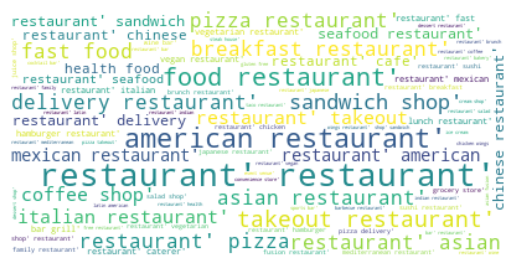

In [53]:
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

### 1.1.7 Columna <code>avg_rating</code>

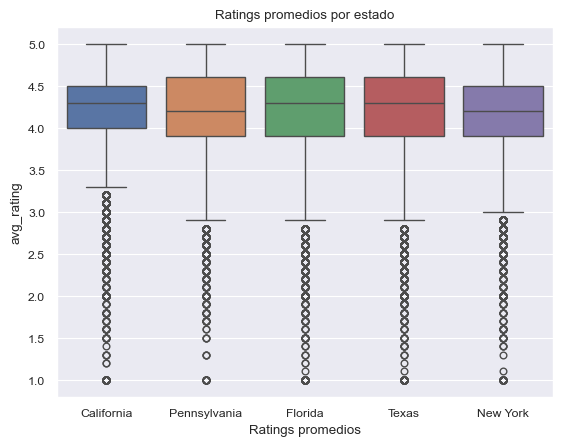

In [54]:
sns.boxplot(data=df_maps_restaurantes, x='state_name', y='avg_rating', hue="state_name" )
plt.title('Ratings promedios por estado')
plt.xlabel('Ratings promedios')
plt.show()

In [55]:
showPiePx(df_maps_restaurantes.avg_rating.astype(int))

In [194]:
fig = px.histogram(df_maps_restaurantes.query("name == 'Subway'"), x='avg_rating', title="Histograma de Ratings")

# fig.update_layout(width=600)

### 1.1.8 Columna <code>num_of_reviews</code>

In [57]:
df_maps_restaurantes.num_of_reviews

0        18 
1        18 
2        8  
3        1  
4        2  
        ..  
81389    144
81390    98 
81391    393
81392    348
81393    308
Name: num_of_reviews, Length: 81393, dtype: int64

In [58]:
df_maps_restaurantes.num_of_reviews.describe()

count    81393.000000
mean     66.352598   
std      121.394875  
min      1.000000    
25%      16.000000   
50%      38.000000   
75%      78.000000   
max      5321.000000 
Name: num_of_reviews, dtype: float64

In [59]:
# map_st = dict(zip(top_5, range(5)))

In [60]:
nro_reviews = df_maps_restaurantes[['num_of_reviews','state_ab', 'state_name']]

nro_reviews['num_of_reviews'].quantile(.95)

198.0

In [195]:
# sns.histplot(nro_reviews.query("state_ab =='CA' and num_of_reviews <= 1000"), x='num_of_reviews', bins=50)

In [196]:
# sns.histplot(nro_reviews.query("state_ab =='PA' and num_of_reviews <= 1000"), x='num_of_reviews', bins=50)

In [197]:
# sns.histplot(nro_reviews.query("state_ab =='TX' and num_of_reviews <= 1000"), x='num_of_reviews', bins=50)

In [198]:
# sns.histplot(nro_reviews.query("state_ab =='FL' and num_of_reviews <= 1000"), x='num_of_reviews', bins=50)

In [199]:
# sns.histplot(nro_reviews.query("state_ab =='NY' and num_of_reviews <= 1000"), x='num_of_reviews', bins=50)

### 1.1.9 Columna <code>price</code>

In [66]:
precio = df_maps_restaurantes.price.reset_index()

In [67]:
precio

,index,price
0,0,None
1,1,None
2,2,None
3,3,$$
4,4,None
...,...,...
81388,81389,$$
81389,81390,None
81390,81391,$
81391,81392,$


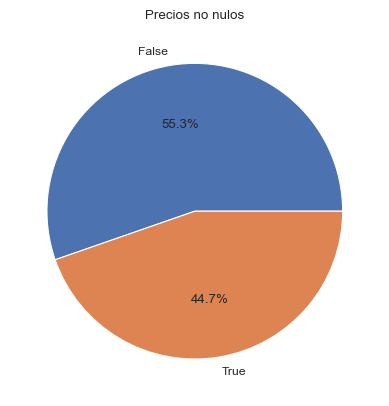

In [68]:
showPie(precio.price.notna(), titulo="Precios no nulos")

In [69]:
precio = precio.query("price.notna()")

In [70]:
precio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36360 entries, 3 to 81391
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   36360 non-null  int64 
 1   price   36360 non-null  object
dtypes: int64(1), object(1)
memory usage: 852.2+ KB


In [71]:
precio_dict = {'$': "$ 0-10","$$":"$ 11-30", "$$$": "$ 31-60", "$$$$": "$ 61-9999"}

precio['precio'] = precio['price'].map(precio_dict)

In [72]:
precio

,index,price,precio
3,3,$$,$ 11-30
13,13,$,$ 0-10
19,19,$,$ 0-10
20,20,$$,$ 11-30
24,24,$$,$ 11-30
...,...,...,...
81386,81387,$,$ 0-10
81387,81388,$$,$ 11-30
81388,81389,$$,$ 11-30
81390,81391,$,$ 0-10


In [200]:
fig = px.pie(precio.value_counts().reset_index(), values="count", names='precio', title='Precios')

# fig.update_layout(width=600, height=400)

### 1.1.10 Columna <code>Hours</code>

In [74]:
horas = df_maps_restaurantes.hours

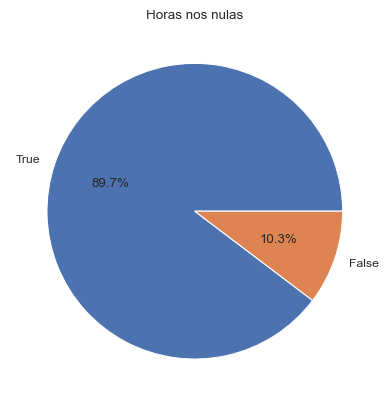

In [75]:
showPie(horas.notna(), titulo="Horas nos nulas")

In [76]:
horas.dropna(inplace=True)

In [77]:
horas_cuentas = horas.explode().explode().value_counts().reset_index()

In [78]:
horas_cuentas[horas_cuentas.index > 6].reset_index(drop=True).head(25)

,hours,count
0,Closed,46876
1,11AM–9PM,35434
2,11AM–10PM,28449
3,11AM–8PM,17158
4,11AM–11PM,12160
5,Open 24 hours,11909
6,10AM–9PM,11600
7,10AM–10PM,9113
8,9AM–9PM,8338
9,11AM–9:30PM,7800


In [203]:
fig = px.bar(horas_cuentas[horas_cuentas.index > 7].reset_index(drop=True).head(35).sort_values(by="count"), x='count', y='hours', orientation='h')

# fig.update_layout( width=800, title="Horas Abiertas", yaxis_title="Estado", xaxis_title="Cantidad Sitios")

# fig.show()

### 1.1.11 Columna <code>MISC</code>

In [80]:
df_misc = pd.json_normalize(df_maps_restaurantes.MISC)

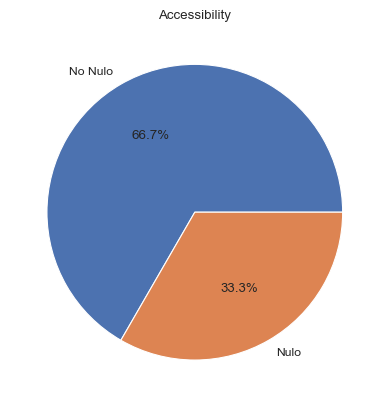

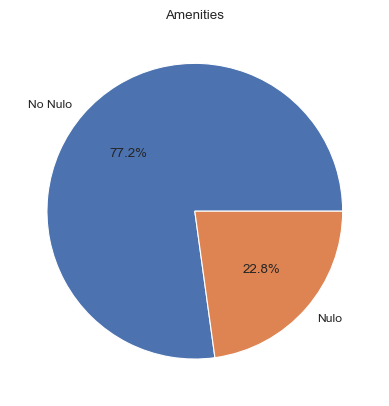

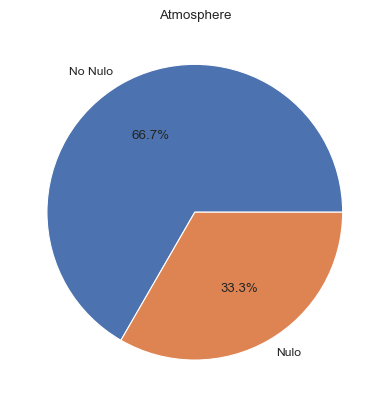

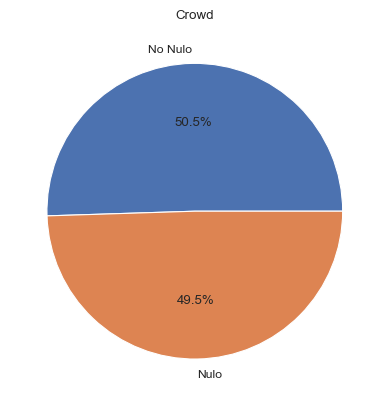

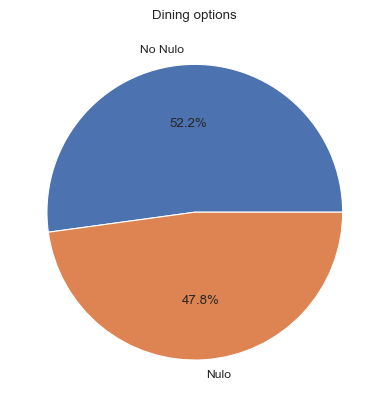

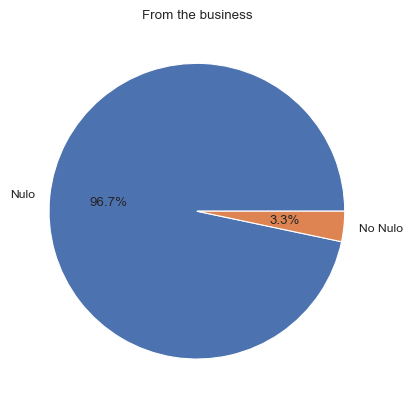

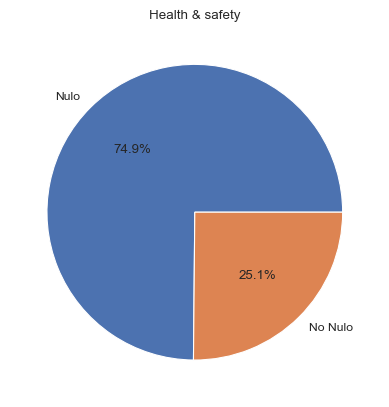

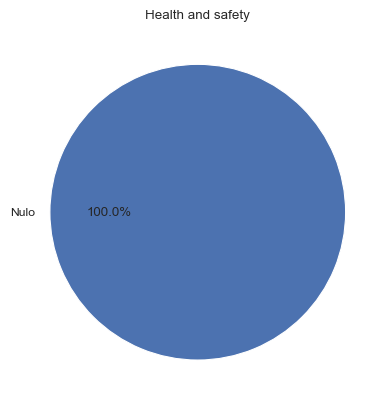

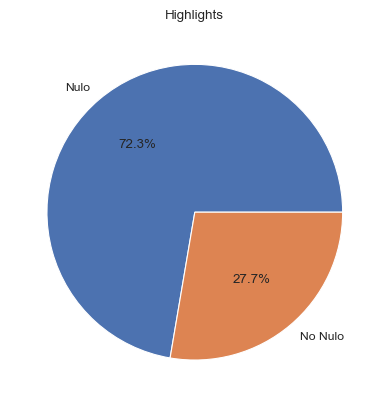

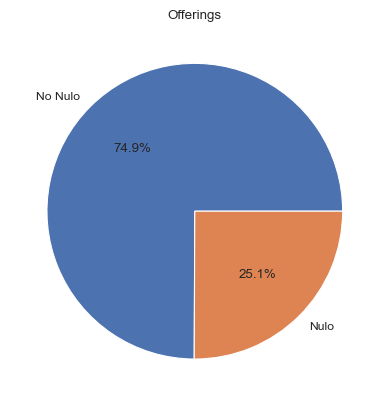

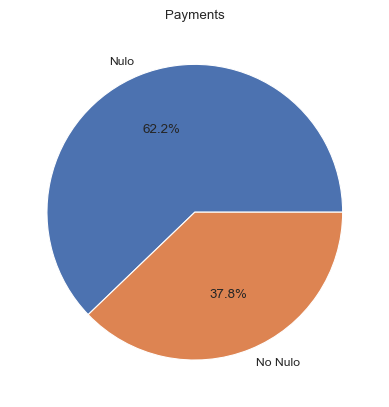

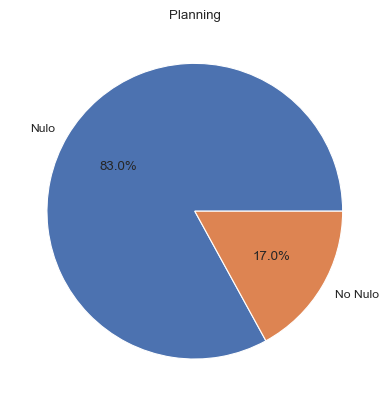

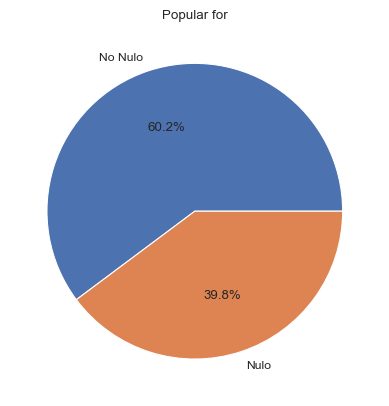

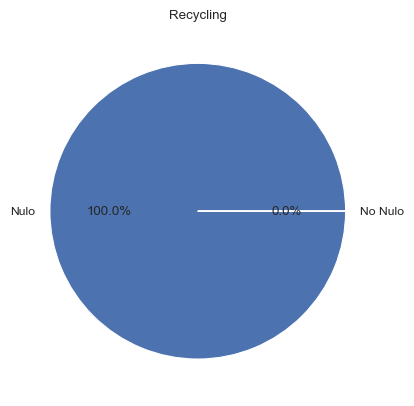

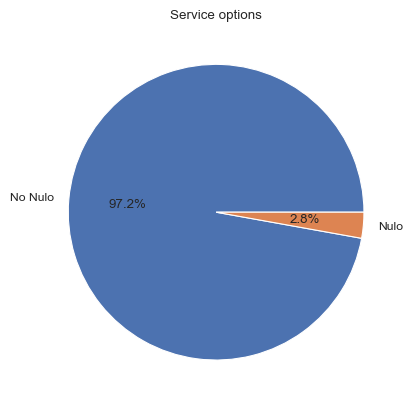

In [81]:

for i in df_misc.columns:
    showPie(df_misc[i].notna().map({True:"No Nulo", False:"Nulo"}), titulo=f"{i}")

In [82]:
for i in df_misc.columns:
    columna = df_misc[i].dropna()
    if len(columna) == 0:
        pass
    else:
        display(columna.explode().head(1000).value_counts().reset_index())

,Accessibility,count
0,Wheelchair accessible entrance,611
1,Wheelchair accessible seating,157
2,Wheelchair accessible parking lot,142
3,Wheelchair accessible restroom,78
4,Wheelchair accessible elevator,12


,Amenities,count
0,Good for kids,649
1,Restroom,107
2,High chairs,89
3,Bar onsite,72
4,Wi-Fi,57
5,Gender-neutral restroom,24
6,Public restroom,2


,Atmosphere,count
0,Casual,790
1,Cozy,173
2,Quiet,21
3,Romantic,12
4,Upscale,4


,Crowd,count
0,Groups,499
1,Family-friendly,193
2,Tourists,190
3,Locals,65
4,College students,53


,Dining options,count
0,Lunch,277
1,Dinner,236
2,Dessert,224
3,Seating,91
4,Breakfast,83
5,Catering,80
6,Counter service,8
7,Pay ahead,1


,From the business,count
0,Identifies as women-led,646
1,Identifies as Black-owned,213
2,Identifies as veteran-led,141


,Health & safety,count
0,Mask required,321
1,Staff required to disinfect surfaces between visits,293
2,Staff wear masks,192
3,Staff get temperature checks,127
4,Safety dividers at checkout,25
5,Temperature check required,25
6,Reservations required,15
7,Appointment required,2


,Highlights,count
0,Great coffee,161
1,Great dessert,151
2,Fast service,135
3,LGBTQ friendly,107
4,Great cocktails,71
5,Transgender safespace,71
6,Great tea selection,58
7,Great beer selection,56
8,Live music,48
9,Sports,44


,Offerings,count
0,Comfort food,224
1,Quick bite,183
2,Small plates,89
3,Coffee,85
4,Vegetarian options,70
5,Healthy options,60
6,Alcohol,50
7,Beer,43
8,Kids' menu,35
9,Wine,33


,Payments,count
0,Debit cards,478
1,Credit cards,247
2,NFC mobile payments,213
3,Cash-only,46
4,Checks,16


,Planning,count
0,Accepts reservations,770
1,Quick visit,187
2,Dinner reservations recommended,35
3,Usually a wait,8


,Popular for,count
0,Solo dining,372
1,Lunch,300
2,Dinner,278
3,Breakfast,50


,Recycling,count
0,Glass bottles,1
1,Metal cans,1
2,Plastic bags,1
3,Plastic bottles,1


,Service options,count
0,Delivery,378
1,Takeout,266
2,Dine-in,214
3,Curbside pickup,49
4,Outdoor seating,33
5,No-contact delivery,33
6,In-store shopping,12
7,Drive-through,7
8,In-store pickup,6
9,Same-day delivery,2


### 1.1.12 Columna <code>state</code>

In [83]:
df_maps_restaurantes.state.value_counts()

state
Permanently closed                           21039
Closed ⋅ Opens 11AM                          6113 
Open ⋅ Closes 9PM                            3394 
Open ⋅ Closes 10PM                           2961 
Closed ⋅ Opens 10AM                          2149 
                                             ...  
Closes soon ⋅ 10:30PM ⋅ Opens 10:30AM Fri    1    
Closes soon ⋅ 2:30PM ⋅ Opens 9AM Fri         1    
Open ⋅ Closes 3PM ⋅ Reopens 7:30PM           1    
Closes soon ⋅ 1:30PM ⋅ Reopens 4:30PM        1    
Closes soon ⋅ 9AM ⋅ Reopens 11AM             1    
Name: count, Length: 1450, dtype: int64

### 1.1.13 Columna <code>relative_results</code>

In [84]:
sitios_relativos =df_maps_restaurantes.relative_results.explode().value_counts().head(25)

In [85]:
px.bar(sitios_relativos)

### 1.1.14 Columna <code>url</code>

In [86]:
df_maps_restaurantes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81393 entries, 0 to 81393
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              81393 non-null  object 
 1   address           81393 non-null  object 
 2   gmap_id           81393 non-null  object 
 3   description       25569 non-null  object 
 4   latitude          81393 non-null  float64
 5   longitude         81393 non-null  float64
 6   category          81393 non-null  object 
 7   avg_rating        81393 non-null  float64
 8   num_of_reviews    81393 non-null  int64  
 9   price             36360 non-null  object 
 10  hours             72996 non-null  object 
 11  MISC              80920 non-null  object 
 12  state             73245 non-null  object 
 13  relative_results  64235 non-null  object 
 14  url               81393 non-null  object 
 15  state_ab          81393 non-null  object 
 16  state_name        81393 non-null  object 
dty

In [87]:
urls =df_maps_restaurantes.url.explode().value_counts().head(25)

px.bar(urls)


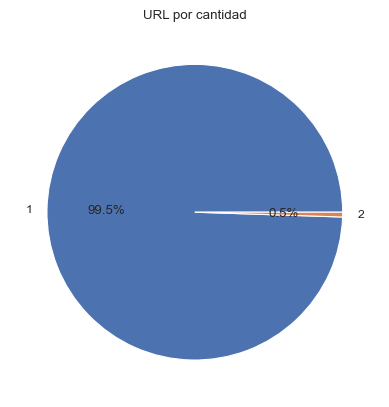

In [88]:
showPie(df_maps_restaurantes.url.value_counts(), titulo="URL por cantidad")

Cómo vemos esta columna está correlacionada con el map id

## 1.2 Dataset de Maps Reviews

In [90]:
df_maps_reviews = pd.read_parquet(URL_MAPS_REVIEWS_ESTADOS)

In [92]:
df_maps_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8339179 entries, 0 to 8339178
Data columns (total 10 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   user_id  object
 1   name     object
 2   time     int64 
 3   rating   int64 
 4   text     object
 5   pics     object
 6   resp     object
 7   gmap_id  object
 8   anio     int64 
 9   estado   object
dtypes: int64(3), object(7)
memory usage: 636.2+ MB


In [94]:
df_maps_reviews.user_id.value_counts().head(25)

user_id
111654318848895716760    322
107873728140436145950    232
115801234546586363775    217
116689568841352995167    188
116130662739719330497    185
111689873643593628899    183
104028254606183740456    174
100332114238682402189    172
108074224926082943504    170
102091958155808202866    170
111556152930435457350    169
103018272043208039402    168
109296147958484484959    167
103237729589375373179    165
114684999067907982861    164
116129308330026870003    163
115357236835901440480    162
112025525505519192397    160
104731006993930939215    156
101420331499465690315    153
107774045688237188169    149
102491288700322606783    146
104445299119288037960    145
105297869259532440759    142
100627493536459041942    138
Name: count, dtype: int64

In [95]:
df_maps_reviews.name.value_counts().head(25)

name
A Google User     3525
Chris             1152
John              1058
David             1027
J                 1015
Google User       960 
Mike              942 
Michael           885 
J C               849 
Brian             840 
Jose Rodriguez    825 
Alex              780 
J B               759 
Mark              735 
John Smith        723 
James             715 
M                 713 
Jose Hernandez    698 
J M               693 
J D               687 
Steve             672 
Michael Smith     652 
J P               639 
Sarah             638 
J R               637 
Name: count, dtype: int64

In [150]:
df_maps_horas_rev = df_maps_reviews.time.apply(lambda t: pd.to_datetime(t//3600000, unit='h'))

df_maps_horas_rev.value_counts()

time
2018-12-07 00:00:00    1832
2019-03-05 02:00:00    1724
2019-10-09 00:00:00    1425
2017-06-14 14:00:00    1371
2019-01-11 23:00:00    1311
                       ... 
2017-05-20 08:00:00    12  
2017-03-10 09:00:00    11  
2017-05-18 08:00:00    10  
2018-03-15 20:00:00    10  
2017-11-24 16:00:00    8   
Name: count, Length: 26280, dtype: int64

In [152]:
df_maps_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8339179 entries, 0 to 8339178
Data columns (total 10 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   user_id  object
 1   name     object
 2   time     int64 
 3   rating   int64 
 4   text     object
 5   pics     object
 6   resp     object
 7   gmap_id  object
 8   anio     int64 
 9   estado   object
dtypes: int64(3), object(7)
memory usage: 636.2+ MB


In [204]:
# px.histogram(df_maps_horas_rev, nbins=360)

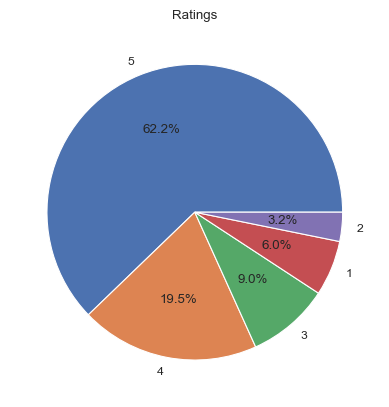

In [161]:
showPie(df_maps_reviews.rating, titulo='Ratings')

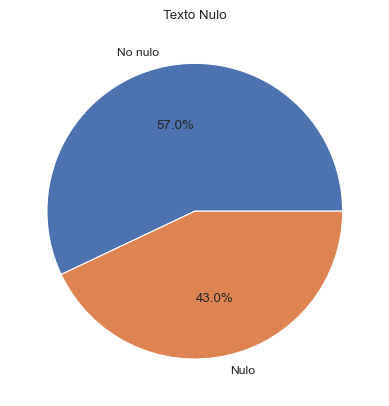

In [165]:
showPie(df_maps_reviews.text.isna().map({False: "No nulo", True: "Nulo"}), titulo="Texto Nulo")

In [170]:
text_reviews = df_maps_reviews.query("text.notna()")['text']

text_reviews

0          Short ribs are very delicious.                                                                                                                                                                                                                                                                 
1          Great food and prices the portions are large                                                                                                                                                                                                                                                   
2          This food is delicious 😁                                                                                                                                                                                                                                                                       
6          Bad service                                                                                 

In [176]:
text_reviews = " ".join(text_reviews).lower()

In [177]:
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True, background_color='white').generate(text_reviews)

cuenta_palabras = pd.DataFrame(data=[wordcloud.process_text(text_reviews)]).T.rename({0:'count'}, axis=1).sort_values(by='count',ascending=False)                    

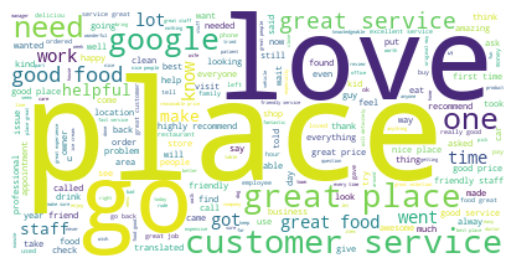

In [178]:
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [179]:
#  pd.DataFrame(data=[wordcloud.process_text(text_reviews)])

,short,food,large,bad,took,weekend,ski,trip,mammoth,rented,...,near now,montgomeryville cycle,bob mcquade,machines parts,astars roadmaster,wyelaah extentui,cat things,dealers got,school de,perros caliente
0,6587,42543,8461,25947,53279,12255,466,9322,101,3581,...,1,4,4,1,1,1,1,1,1,4


In [184]:
# _.T.to_excel('word_cloud_reviews.xlsx')